# MANU 465 Assignment 3 - Semiconductor Manufacturing Process Logistic Regression

### Author:

Liam Bontkes, 25530163

## 1 Project Description

This project goes builds a model to predict the status of part (Pass/Fail) from the Semiconductor Manufacturing Process
dataset. The model will be built using the Logistic Regression method.

### 1.1 Background

Source: https://www.kaggle.com/saurabhbagchi/fmst-semiconductor-manufacturing-project

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are
equally valuable in a specific monitoring system. The measured signals contain a combination of useful information,
irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually
required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield
excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning,
and reduce per-unit production costs. These signals can be used as features to predict the yield type. And by analyzing
and trying out different combinations of features, essential signals that are impacting the yield type can be
identified.

## 2 Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

2021-10-24 21:15:51.310057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-24 21:15:51.310074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 3 Data Preprocessing

### 3.1 Importing the Dataset

In [2]:
dataset = pd.read_csv('../data/SemiconductorManufacturingProcess.csv')

### 3.2 Showing the Dataset in a Table

In [3]:
pd.DataFrame(dataset)

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 429,Sensor 430,Sensor 431,Sensor 432,Sensor 433,Sensor 434,Sensor 435,Sensor 436,Sensor 437,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Pass
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,Pass
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,Pass
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,Pass
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,Pass


### 3.3 A Quick Review of the Data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 439 entries, Time to Pass/Fail
dtypes: float64(437), object(2)
memory usage: 5.2+ MB


### 3.4 Separate The Input and Output
Here, we put the independent variables in X and the dependent variable in y. 

In [5]:
X = dataset.iloc[:, 1:438].values
y = dataset.iloc[:, -1].values

#### 3.4.1 Showing the Input Data in a Table format

In [6]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


#### 3.4.2 A Quick Check of the Output Data

In [7]:
pd.DataFrame(y)

,0
0,Pass
1,Pass
2,Fail
3,Pass
4,Pass
...,...
1562,Pass
1563,Pass
1564,Pass
1565,Pass


### 3.5 Taking care of missing data

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [9]:
# A quick check of X
X

array([[3.03093000e+03, 2.56400000e+03, 2.18773330e+03, ...,
        1.64749042e-02, 5.28333333e-03, 9.96700663e+01],
       [3.09578000e+03, 2.46514000e+03, 2.23042220e+03, ...,
        2.01000000e-02, 6.00000000e-03, 2.08204500e+02],
       [2.93261000e+03, 2.55994000e+03, 2.18641110e+03, ...,
        4.84000000e-02, 1.48000000e-02, 8.28602000e+01],
       ...,
       [2.97881000e+03, 2.37978000e+03, 2.20630000e+03, ...,
        8.60000000e-03, 2.50000000e-03, 4.35231000e+01],
       [2.89492000e+03, 2.53201000e+03, 2.17703330e+03, ...,
        2.45000000e-02, 7.50000000e-03, 9.34941000e+01],
       [2.94492000e+03, 2.45076000e+03, 2.19544440e+03, ...,
        1.62000000e-02, 4.50000000e-03, 1.37784400e+02]])

### 3.6 Encoding Categorical Data

#### 3.6.1 Encoding the Independent Variable

In [10]:
# don't have any categorical data

#### 3.6.2 Encoding the Dependent Variable

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
# a quick check
y

array([1, 1, 0, ..., 1, 1, 1])

### 3.7 Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

### 3.8 Splitting the Dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=34)

In [15]:
print(train_X)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [16]:
print(test_X)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


In [17]:
print(train_y)

[0 1 1 ... 1 1 1]


In [18]:
print(test_y)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


## 4 Logistic Regression Model

### 4.1 Train the model

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=250)

# use the training data
logistic_regression_model.fit(train_X, train_y)

LogisticRegression(max_iter=250)

### 4.1 Test the model

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_regression_model, test_X, test_y, scoring='accuracy', cv=5)
average_score = np.average(scores)

print(f"Averaged prediction accuracy = {average_score}")

Averaged prediction accuracy = 0.9109062980030721


## 5 ANN Model

### 5.1 Initialize the ANN

In [21]:
ann_model = tf.keras.models.Sequential()

2021-10-24 21:15:53.021382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 21:15:53.022031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-24 21:15:53.022088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-24 21:15:53.022134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-24 21:15:53.022193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

### 5.2 Add input layer

In [22]:
ann_model.add(tf.keras.layers.Dense(units=437, activation='relu'))

### 5.3 Add hidden layer

In [23]:
ann_model.add(tf.keras.layers.Dense(units=200, activation='relu'))

### 5.4 Add output layer

In [24]:
ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### 5.5 Compile the model

In [25]:
ann_model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

### 5.6 Train the model

In [26]:
fitting = ann_model.fit(train_X, train_y, batch_size=32, epochs=100)

2021-10-24 21:15:53.108289: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.8476
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9346
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9346
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9346
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9346
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9346
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9346
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9346
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9346
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9346
Epoch 11/

40/40 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9649
Epoch 84/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9649
Epoch 85/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9649
Epoch 86/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9705
Epoch 87/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9697
Epoch 88/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9713
Epoch 89/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9713
Epoch 90/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9713
Epoch 91/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9713
Epoch 92/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9721
Epoch 93/100


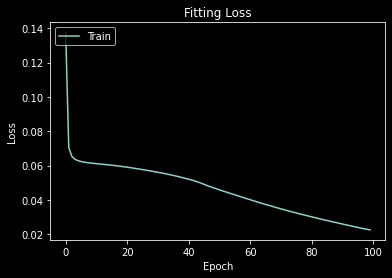

In [27]:
plt.style.use('dark_background')

plt.plot(fitting.history['loss'])
plt.title('Fitting Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 5.7 Evaluate the model

In [28]:
ann_model.evaluate(test_X, test_y)

10/10 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9331


[0.06448440253734589, 0.9331210255622864]

## 6 Conclusion

The average prediction accuracy of the logistic regression model on the dataset is 91%. The highest prediction accuracy
I was able to achieve with the ANN model is 93%. I played around with additional hidden layers but these additions
reduced the model accuracy.